# Statistique inférentielle

### Statistique inférentielle vs Statistique descriptive

**Statistique descriptive:**

L'objectif est de décrire les données.

On peut en faire une représentation synthétique, sous formes graphiques ou en résumés numériques via des indicateurs.

**Statistique inférentielle:**

L'objectif est de préciser un phénomène sur une population à partir de son observation sur une partie restreinte de la population appelé échantillon.

On va étudier les caractéristiques de la population (par rapport aux variables étudiées) comme la moyenne, la dispersion...
Ou encore valider ou infirmer les hypothèses, sans interroger tous les individus de la population.

La statistique inférentielle est une méthodologie pour inférer les conclusions concernant les résultats d'un échantillon représentatif à la population dont il est issu. Elle s'appuie sur la théorie des probabilités.

Les deux grands types de méthodes sont l'estimation et les tests d'hypothèse.

# Import Libraries

In [1]:
from scipy import stats
import seaborn as sns
import pandas as pd

# Load the Titanic dataset

In [2]:
titanic = sns.load_dataset("titanic")

# Now you can access the data in the 'titanic' DataFrame
titanic.head()  # This will show the first few rows of the dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Number of missing data
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: xlabel='sex', ylabel='count'>

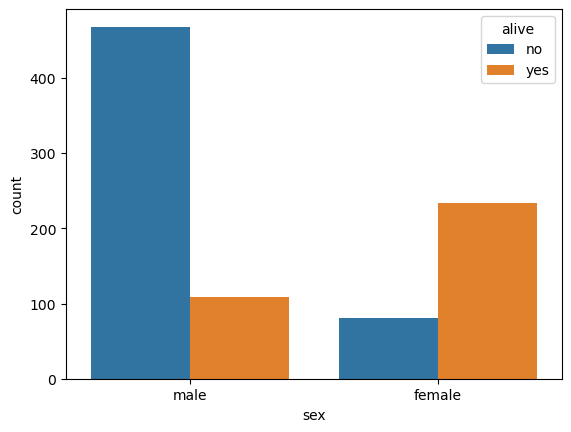

In [4]:
# Diagramme à barre:

sns.countplot(x='sex', hue='alive', data = titanic)

# hue: variable couleur

# Test du Chi-Deux

Les hypothèses:

$ H_O : \{ la \ survie \ est \ indépendante \ du \ genre \} $  
$ H_1 : \{ la \ survie \ est \ dépendante \ du \ genre \} $

Tableau de contingence entre les variables survie et genre

In [5]:
# Tableau de contingence

cont = pd.crosstab(titanic['sex'], titanic['alive'])

cont

alive,no,yes
sex,,
female,81,233
male,468,109


In [40]:
# Count expected (1,1):
(81+468)*(81+233)/(81+468+233+109)

193.4747474747475

In [41]:
# The expected contingency:
stats.contingency.expected_freq(cont)

array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]])

In [35]:
# Tableau de contingence en pourcentage

pd.crosstab(titanic['sex'], titanic['alive'], normalize='index').mul(100).round(0).astype(str) + '%'

alive,no,yes
sex,,
female,26.0%,74.0%
male,81.0%,19.0%


Test du chi2

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

stats.chi2_contingency(cont)

In [60]:
# Test du Chi-2 avec correction de Pearson

chi2, pvalue, dof, expected  = stats.chi2_contingency(cont, correction=False)

# 1. Correction de Yates (par défaut):
# C'est la méthode la plus courante et elle est recommandée pour les petits échantillons (moins de 5 observations par cellule). 
# Elle consiste à soustraire 0,5 de chaque cellule du tableau de contingence avant de calculer le chi-deux.

# 2. Correction de Pearson:
# Elle est moins conservative que la correction de Yates et est recommandée pour les grands échantillons (plus de 20 observations par cellule). 
# Elle consiste à calculer le chi-deux sur la base des fréquences attendues, qui sont calculées en supposant l'indépendance des variables.

In [61]:
# The statistic Chi-2:
chi2

263.05057407065567

In [62]:
# The p-value:
print('p-value: ', pvalue)

p-value:  3.711747770113424e-59


In [66]:
# Afficher les résultats

# Seuil de risque alpha de 5%
ALPHA = 0.05

print("Chi-deux:", chi2)
print("p-valeur:", pvalue)
print("Degrés de liberté:", dof)
print("Valeurs attendues:", expected)

Chi-deux: 263.05057407065567
p-valeur: 3.711747770113424e-59
Degrés de liberté: 1
Valeurs attendues: [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


In [67]:
# Conclusion

if pvalue <= ALPHA:
    print("Rejet de l'hypothèse nulle : il y a dépendance entre les deux variables.")
else:
    print("Acceptation de l'hypothèse nulle : Les deux variables ne sont pas dépendantes.")

Rejet de l'hypothèse nulle : il y a dépendance entre les deux variable.


# Test de Student

Le test de Student a pour objectif de comparer les moyennes d'une variable numérique entre deux groupes.

In [68]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [90]:
# Afficher les âges des 5 premières hommes:

# filtre sur les hommes:
mask = (titanic['sex'] == 'male') & titanic['age'].notnull()

# ages des hommes:
man_age = titanic.loc[mask, 'age']

man_age.head()

0     22.0
4     35.0
6     54.0
7      2.0
12    20.0
Name: age, dtype: float64

In [91]:
# Calculer l'âge moyen des hommes:

titanic.loc[mask, 'age'].mean()

30.72664459161148

In [92]:
# Même exercice pour les femmes

# Âge des 5 permières femmes:

# filtre sur les femmes dont l'âge est renseigné:

mask = (titanic['sex'] == 'female') & (titanic['age'].notnull())

# ages des femmes:

woman_age = titanic.loc[mask, 'age']

woman_age.head().astype(int)

1    38.0
2    26.0
3    35.0
8    27.0
9    14.0
Name: age, dtype: float64

In [93]:
# Âge moyen des femmes:

titanic.loc[mask, 'age'].mean()

27.915708812260537

Avant d'effectuer le test d'égalité des moyennes de Student Il faut s'assurer que les conditions pour effectuer le test sont remplies.  



**Conditions d'utilisation du Test de Student:**

Le test de Student repose sur plusieurs conditions :

- Normalité des données: 

Les données de chaque groupe doivent suivre une distribution normale.

- Homogénéité des variances: 

Les variances des deux groupes doivent être égales.


- Indépendance des observations:

Les observations de chaque groupe doivent être indépendantes les unes des autres.

Vérification des conditions:

1. Normalité des données:

- Histogramme: 

Visualisez l'histogramme de l'âge pour chaque groupe. La forme de l'histogramme doit être symétrique et sans valeurs aberrantes.



Vérification des conditions:

1. Normalité des données:

- Test de Shapiro-Wilk: 

Effectuez un test de **Shapiro-Wilk** pour chaque groupe. La p-valeur doit être supérieure au seuil de 0,05 pour ne pas rejeter l'hypothèse de normalité.  

In [107]:
# Tester la normalité des données
print("Hommes:")

mask = (titanic['sex'] == 'male') & titanic['age'].notnull()

print(stats.shapiro(titanic.loc[mask, 'age']),'\n')

print("Femmes:")

mask = (titanic['sex'] == 'female') & titanic['age'].notnull()

print(stats.shapiro(titanic.loc[mask, 'age']))

Hommes:
ShapiroResult(statistic=0.9747290015220642, pvalue=4.5739304255221214e-07) 

Femmes:
ShapiroResult(statistic=0.9847877025604248, pvalue=0.007052930071949959)


Interprétation:

Les p-valeurs des tests de Shapiro-Wilk sont supérieures à 0,05 pour les deux groupes, ce qui ne permet pas de rejeter l'hypothèse de normalité.
La p-valeur du test de Levene est supérieure à 0,05, ce qui ne permet pas de rejeter l'hypothèse d'homogénéité des variances.

Vérification des conditions:

2. Homogénéité des variances:

Test de Levene: Effectuez un **test de Levene** pour comparer les variances des deux groupes. La p-valeur doit être supérieure au seuil de 0,05 pour ne pas rejeter l'hypothèse d'homogénéité des variances.


In [108]:
mask1 = (titanic['sex'] == 'male') & titanic['age'].notnull()
mask2 = (titanic['sex'] == 'female') & titanic['age'].notnull()

print(stats.levene(titanic.loc[mask1, 'age'], titanic.loc[mask2, 'age']))

LeveneResult(statistic=0.0013033299127842275, pvalue=0.9712114169671999)


Vérification des conditions:

2. Homogénéité des variances:

Test de Levene: Effectuez un test de Levene pour comparer les variances des deux groupes. La p-valeur doit être supérieure au seuil de 0,05 pour ne pas rejeter l'hypothèse d'homogénéité des variances.



In [94]:
# Test de Student d'égalité des moyennes:

t, pvalue = stats.ttest_ind(man_age, woman_age)

In [95]:
# Fixation du seuil de risque:

ALPHA = 0.05

In [96]:
# Afficher les résultats:

print("t-statistique:", t)
print("p-valeur:", pvalue)

t-statistique: 2.499206354920835
p-valeur: 0.012671296797013709


In [101]:
# Conclusion du test de Student:

if pvalue <= ALPHA:
   print("Rejet de l'hypothèse nulle : Les moyennes sont différentes au seuil alpha.")
else:
  print("Acceptation de l'hypothèse nulle : Les moyennes ne sont pas différentes.")

Rejet de l'hypothèse nulle : Les moyennes sont différentes au seuil alpha.


La p-valeur est de 0,01267, ce qui est inférieur au seuil de 0,05. Cela signifie que nous pouvons rejeter l'hypothèse nulle à un niveau de confiance de 95%.   

En d'autres termes, il y a suffisamment de preuves pour conclure que la moyenne d'âge est différente entre les hommes et les femmes.

In [ ]:
import pandas as pd
from scipy import stats

# Importer le jeu de données
df = pd.read_csv("titanic.csv")

# Filtrer les passagers de sexe "male" et "female"
df = df.loc[df['Sex'].isin(['male', 'female'])]

# Comparer la moyenne d'âge entre les hommes et les femmes
t, p = stats.ttest_ind(df.loc[df['Sex'] == 'male', 'Age'], df.loc[df['Sex'] == 'female', 'Age'])

# Déterminer le seuil de p-valeur
alpha = 0.05

# Afficher les résultats
print("t-statistique:", t)
print("p-valeur:", p)

# Conclusion
if p <= alpha:
  print("Rejet de l'hypothèse nulle : La moyenne d'âge est différente entre les hommes et les femmes.")
else:
  print("Acceptation de l'hypothèse nulle : La moyenne d'âge n'est pas différente entre les hommes et les femmes.")

# Test de Corrélation

# Test ANOVA

In [4]:

# Définir les degrés de liberté
df1 = 3
df2 = 56

# Définir le niveau de confiance (1 - alpha)
confidence_level = 1 - 0.05

In [ ]:

# Calculer la statistique de Fisher
f_stat = stats.fstat(df1, df2, confidence_level)

# Afficher la statistique de Fisher
print(f"Statistique de Fisher: {f_stat}")

Bibliographie:
- Statistique inféérentielle : idées, démarches,exemples. J.J. Daudin, S. Robin, C. Vuillet. Société Française de Statistique et Presses Universitaires de Rennes (PUR). Collection“Pratique de la Statistique”. 1999
- Comprendre et utiliser les statistiques dans les sciences de la vie. B. Falissard. Masson. 2005 (3eme ed).
- Probabilités, Analyse des données et Statistiques. G. Saporta. Editions Technip. 2011.
- Statistiques avec R. PA. Cornillon, A. Guyader, F. Husson, N. Jégou, J. Josse, M. Kloareg, E. Matzner-Lober, L. Rouviére. PUR, France. 2010 (2eme ed augmentée).
- http ://www.agro-montpellier.fr/cnam-lr/statnet Le site ”Les Techniques de la Statistique”
- http ://wikistat.fr
- http ://eric.univ-lyon2.fr/ ricco/cours/index.html ”M ́ethodes statistiques” / Cours de statistique